# **Project Name**    -



##### **Project Type**    -Unsupervised
##### **Contribution**    - Individual
##### **Team Member** - RINA PATEL

# **Project Summary -**

Introduction:
 In this project, we leverage unsupervised machine learning techniques to analyze book features, user preferences,ratings and purchase histories to generate tailored book recommendations. This system aims to enhance the user experience by helping readers discover books that align with their interests, leading to increased user engagement and satisfaction.

Personalized Recommendations: The primary objective of the project is to deliver book recommendations that cater to individual user preferences.

The Book-Crossing dataset comprises 3 files.

● Users :

Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.

● Books :

Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.

● Ratings :

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

Data Collection and Preprocessing: Gather a diverse dataset comprising information about books, such as title, author, genre, synopsis, and user data like purchase history and browsing behavior. This data is preprocessed to eliminate noise and inconsistencies.

Feature Engineering: Extract relevant features from books data, ratings data and users data.

Unsupervised Learning: The project focuses on employing unsupervised machine learning algorithms, such as Model Based Collaborative Filtering Recommender,Collaborative Filtering based Recommendation System-(Item Based), Collaborative Filtering based Recommendation System-(User based) and Popularity Based Filtering, to uncover patterns and similarities in books and user behavior.


Conclusion:
The Unsupervised Book Recommendation System project seeks to deliver a sophisticated and personalized book recommendation solution that empowers users to discover books that align with their interests. By leveraging unsupervised machine learning techniques, this project addresses the challenges of traditional recommendation systems and enhances the user experience by providing tailored recommendations, ultimately driving user engagement and satisfaction.

As the project advances and the system is deployed, continuous monitoring and feedback will play a crucial role in refining the recommendations and ensuring that users receive high-quality book suggestions.

# **GitHub Link -**

https://github.com/rins3005/Book_Recommendation_System.git.

# **Problem Statement**


**During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys. In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors.**

* **The main objective is to create a book recommendation system for users.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import scipy
import math
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

#hide warnigs
import warnings
warnings.filterwarnings(action='ignore')


### Dataset Loading

In [2]:
#loading user.csv data as users_df
users_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Book Recommendation System/Users.csv')

In [3]:
#loading user.csv data as books_df
books_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Book Recommendation System/Books.csv')

In [5]:
#loading user.csv data as ratings_df
ratings_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Book Recommendation System/Ratings.csv')

### Dataset First View

In [6]:
# Dataset First Look of users data
users_df.head(10)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [7]:
# Dataset First Look of books data
books_df.head(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...


In [8]:
# Dataset First Look of ratings data
ratings_df.head(10)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count of users data
users_df.shape

(278858, 3)

In [10]:
# Dataset Rows & Columns count of books data
books_df.shape

(271360, 8)

In [11]:
# Dataset Rows & Columns count of ratings data
ratings_df.shape

(1149780, 3)

### Dataset Information

In [12]:
# Dataset Info of users data
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [13]:
# Dataset Info of books data
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [14]:
# Dataset Info of ratings data
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


#### Duplicate Values

In [15]:
# Dataset Duplicate Value Count of users data
users_df.duplicated().sum()

0

In [16]:
# Dataset Duplicate Value Count of books data
books_df.duplicated().sum()

0

In [17]:
# Dataset Duplicate Value Count of ratings data
ratings_df.duplicated().sum()

0

#### Missing Values/Null Values

In [18]:
# Missing Values/Null Values Count of users data
users_df.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

<Axes: >

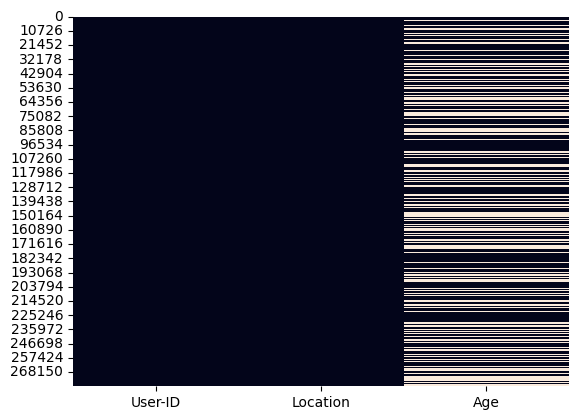

In [19]:
# Visualizing the missing values of users data
sns.heatmap(users_df.isna(), cbar=False)

In [20]:
# Missing Values/Null Values Count of books data
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

<Axes: >

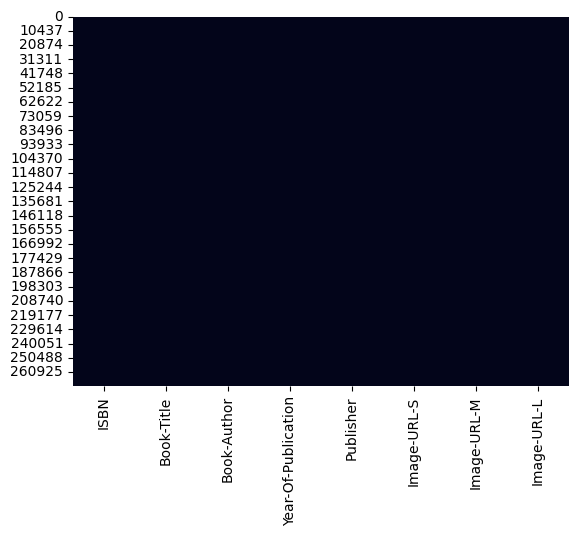

In [21]:
# Visualizing the missing values of books data
sns.heatmap(books_df.isna(), cbar=False)

In [22]:
# Missing Values/Null Values Count of ratings data
ratings_df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

<Axes: >

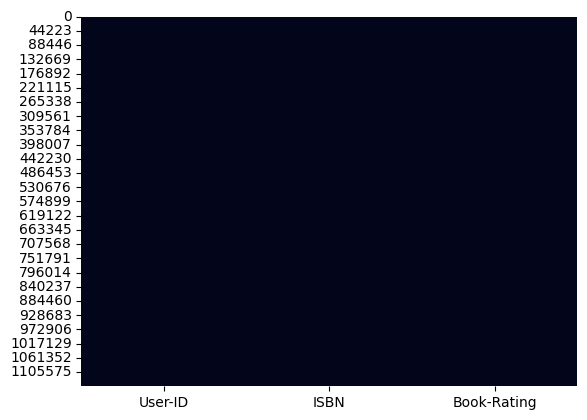

In [23]:
# Visualizing the missing values of ratings
sns.heatmap(ratings_df.isna(), cbar=False)

### What did you know about your dataset?

Answer Here
In this dataset contains shape of users_df is 278858, 3 shape of books_df is 271360, 8 shape of ratings_df is 1149780, 3.No duplicate values have been identified in the dataset. Around 39% of the data is missing in users_df of "Age" columns. Additionally, there are also some missing values in the"Book-Author","Image-URL-L" and "Publisher" of books_df dataset. No missing value in ratings_df dataset.

## ***2. Understanding Your Variables***

In [24]:
# Dataset Columns of users data
users_df.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [25]:
# Dataset Describe of users data
users_df.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [26]:
# Dataset Columns of books data
books_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [27]:
# Dataset Describe of books data
books_df.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [28]:
# Dataset Columns of ratings data
ratings_df.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [29]:
# Dataset Describe of ratings data
ratings_df.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


### Variables Description

Answer Here
The users_df dataset comprises 3 variables, with 2 being numeric and 1 being of object type.
The books_df dataset comprises  8 variables, all of object type.
The ratings_df dataset comprises 3 variables,with 2 being numeric and 1 being of object type.

### Check Unique Values for each variable.

In [30]:
# Check Unique Values for each variable of users data.
for i in users_df.columns.tolist():
    print("No. of unique values in ",i,"is",users_df[i].unique(),".")
    print('')

No. of unique values in  User-ID is [     1      2      3 ... 278856 278857 278858] .

No. of unique values in  Location is ['nyc, new york, usa' 'stockton, california, usa'
 'moscow, yukon territory, russia' ... 'sergnano, lombardia, italy'
 'stranraer, n/a, united kingdom' 'tacoma, washington, united kingdom'] .

No. of unique values in  Age is [ nan  18.  17.  61.  26.  14.  25.  19.  46.  55.  32.  24.  20.  34.
  23.  51.  31.  21.  44.  30.  57.  43.  37.  41.  54.  42.  50.  39.
  53.  47.  36.  28.  35.  13.  58.  49.  38.  45.  62.  63.  27.  33.
  29.  66.  40.  15.  60.   0.  79.  22.  16.  65.  59.  48.  72.  56.
  67.   1.  80.  52.  69.  71.  73.  78.   9.  64. 103. 104.  12.  74.
  75. 231.   3.  76.  83.  68. 119.  11.  77.   2.  70.  93.   8.   7.
   4.  81. 114. 230. 239.  10.   5. 148. 151.   6. 101. 201.  96.  84.
  82.  90. 123. 244. 133.  91. 128.  94.  85. 141. 110.  97. 219.  86.
 124.  92. 175. 172. 209. 212. 237.  87. 162. 100. 156. 136.  95.  89.
 106.  99. 1

In [31]:
for i in users_df.columns.tolist():
  print("No. of unique values in ",i,"is",users_df[i].nunique(),".")

No. of unique values in  User-ID is 278858 .
No. of unique values in  Location is 57339 .
No. of unique values in  Age is 165 .


In [32]:
# Check Unique Values for each variable of books data.
for i in books_df.columns.tolist():
    print("No. of unique values in ",i,"is",books_df[i].unique(),".")
    print('')

No. of unique values in  ISBN is ['0195153448' '0002005018' '0060973129' ... '006008667X' '0192126040'
 '0767409752'] .

No. of unique values in  Book-Title is ['Classical Mythology' 'Clara Callan' 'Decision in Normandy' ...
 'Lily Dale : The True Story of the Town that Talks to the Dead'
 "Republic (World's Classics)"
 "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"] .

No. of unique values in  Book-Author is ['Mark P. O. Morford' 'Richard Bruce Wright' "Carlo D'Este" ...
 'David Biggs' 'Teri Sloat' 'Christopher  Biffle'] .

No. of unique values in  Year-Of-Publication is [2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 19

In [33]:
for i in books_df.columns.tolist():
  print("No. of unique values in ",i,"is",books_df[i].nunique(),".")

No. of unique values in  ISBN is 271360 .
No. of unique values in  Book-Title is 242135 .
No. of unique values in  Book-Author is 102023 .
No. of unique values in  Year-Of-Publication is 202 .
No. of unique values in  Publisher is 16807 .
No. of unique values in  Image-URL-S is 271044 .
No. of unique values in  Image-URL-M is 271044 .
No. of unique values in  Image-URL-L is 271041 .


In [34]:
# Check Unique Values for each variable of ratings data.
for i in ratings_df.columns.tolist():
    print("No. of unique values in ",i,"is",ratings_df[i].unique(),".")
    print('')

No. of unique values in  User-ID is [276725 276726 276727 ... 276709 276721 276723] .

No. of unique values in  ISBN is ['034545104X' '0155061224' '0446520802' ... '0679752714' '0806917695'
 '05162443314'] .

No. of unique values in  Book-Rating is [ 0  5  3  6  8  7 10  9  4  1  2] .



In [35]:
for i in ratings_df.columns.tolist():
  print("No. of unique values in ",i,"is",ratings_df[i].nunique(),".")

No. of unique values in  User-ID is 105283 .
No. of unique values in  ISBN is 340556 .
No. of unique values in  Book-Rating is 11 .
